In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

from load_data import *
from clean_data import *

import warnings
warnings.filterwarnings('ignore')


import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import seaborn as sb

from sklearn.model_selection import train_test_split


/Users/matthewhwang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/matthewhwang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/matthewhwang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/matthewhwang/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
X,y = load_data()

Load Data Begin


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
BATCH_SIZE = 20
BUFFER_SIZE = 10000

In [10]:
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_data = val_data.batch(BATCH_SIZE).repeat()

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(32,input_shape=X_train.shape[-2:],return_sequences=True,dropout=0.5,activation="softmax"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.LSTM(32,input_shape=X_train.shape[-2:],dropout=0.5,activation="softmax"))
model.add(tf.keras.layers.Dense(4,activation="softmax"))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
EVALUATION_INTERVAL = 200
EPOCHS = 20
history = model.fit(train_data, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data,
                                            validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/20
200/200 [==============================] - 12s 59ms/step - loss: 1.2633 - accuracy: 0.4825 - val_loss: 1.1415 - val_accuracy: 0.4990
Epoch 2/20
200/200 [==============================] - 7s 34ms/step - loss: 1.0432 - accuracy: 0.5015 - val_loss: 0.9563 - val_accuracy: 0.4990
Epoch 3/20
200/200 [==============================] - 7s 33ms/step - loss: 0.8926 - accuracy: 0.4992 - val_loss: 0.8381 - val_accuracy: 0.4990
Epoch 4/20
200/200 [==============================] - 7s 34ms/step - loss: 0.8010 - accuracy: 0.5010 - val_loss: 0.7696 - val_accuracy: 0.4990
Epoch 5/20
200/200 [==============================] - 7s 34ms/step - loss: 0.7495 - accuracy: 0.5092 - val_loss: 0.7322 - val_accuracy: 0.5230
Epoch 6/20
200/200 [==============================] - 7s 33ms/step - loss: 0.7197 - accuracy: 0.6140 - val_loss: 0.7057 - val_accuracy: 0.6830
Epoch 7/20
200/200 [==============================] - 7s 33ms/step - loss: 0.6939 - accuracy: 0.69

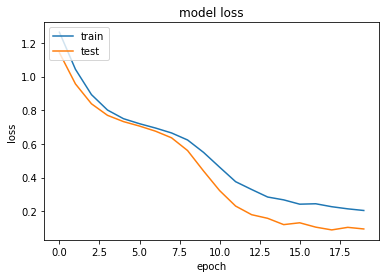

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.predict(X_test)

array([[4.0586347e-05, 1.3556339e-01, 3.8902890e-05, 8.6435711e-01],
       [2.6394488e-05, 9.3684369e-01, 2.1203430e-05, 6.3108757e-02],
       [2.6938844e-05, 9.3599331e-01, 2.1659311e-05, 6.3958153e-02],
       [3.7434675e-05, 1.1115154e-01, 3.6224053e-05, 8.8877481e-01],
       [1.1930187e-05, 1.6373305e-02, 1.3114512e-05, 9.8360163e-01],
       [2.6510723e-05, 9.3649048e-01, 2.1301843e-05, 6.3461728e-02],
       [4.3978278e-05, 1.6063292e-01, 4.1751002e-05, 8.3928138e-01],
       [2.6957196e-05, 9.3564445e-01, 2.1676897e-05, 6.4306974e-02],
       [2.7132459e-05, 9.3557149e-01, 2.1822343e-05, 6.4379580e-02],
       [2.6571726e-05, 9.3601465e-01, 2.1355523e-05, 6.3937545e-02],
       [1.4607498e-05, 2.1625826e-02, 1.5662832e-05, 9.7834384e-01],
       [2.4730287e-05, 5.0574332e-02, 2.5006722e-05, 9.4937593e-01],
       [2.6596748e-05, 9.3634140e-01, 2.1374064e-05, 6.3610725e-02],
       [5.7058227e-05, 3.3976391e-01, 5.2008021e-05, 6.6012704e-01],
       [2.0831005e-05, 3.7397321e-